# Problem Statement:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives us information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, we have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [1]:
#importing the lib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df=pd.read_csv('titanic')
#cheaking the top 5 rows and columns
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#cheaking last 5 rows and columns

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
#cheaking the random sample

df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,NaN,S


In [5]:
#cheaking the no.of rows and columns

df.shape

(891, 12)

In [6]:
#cheaking the column names

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#cheaking the dtype information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#cheaking the datatype

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#null values

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

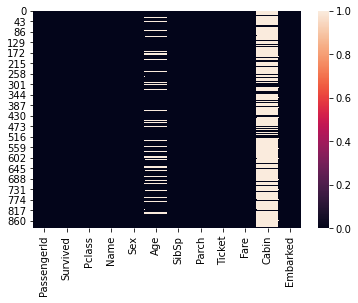

In [11]:
#heatmap for null values

sns.heatmap(df.isnull())

from above analysis, we can note few things

1.we need to convert a lot of features in to numeric ones
2.we cal also see that some features are containing the null values(NaN=not a number)

In [12]:
#cheaking the value counts

df.value_counts('Sex')

Sex
male      577
female    314
dtype: int64

In [13]:
df.value_counts('Embarked')

Embarked
S    644
C    168
Q     77
dtype: int64

In [14]:
df['Cabin'].nunique()

147

In [15]:
df['Embarked'].nunique()

3

In [16]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S


# Encoding 

In [17]:
#Encoding the column sex and embarked eith the help of label encoder
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
list=['Sex','Embarked']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))

In [18]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0


In [19]:
# Now filling the NaN values

df['Embarked']=df['Embarked'].replace(np.nan,df['Embarked'].mode()[0])

In [20]:
df['Age']=df['Age'].replace(np.nan,df['Age'].median())

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
#Dropping the Columns from dataset

df.drop(columns=['Name','Ticket','Cabin'],inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# Statistical Analysis


In [24]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


Remarks:

count for all the columns are same, so, no data is missing.

mean is greater than median in Fare, so, data might be right skewed.

std is higher in PassengerId and Fare, so, data might be spreaded.

Large difference between 75th percentile and max is present in Fare. There might be some outliers

# Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='Sex', ylabel='count'>

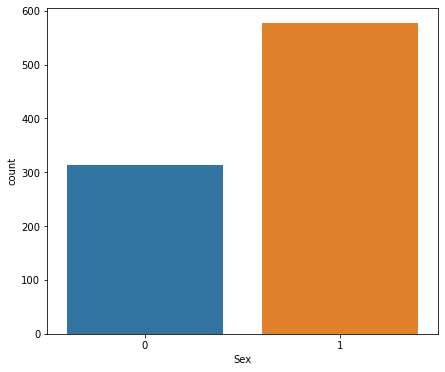

In [25]:
plt.figure(figsize=(7,6))
sns.countplot(df.Sex)

<AxesSubplot:xlabel='PassengerId', ylabel='Density'>

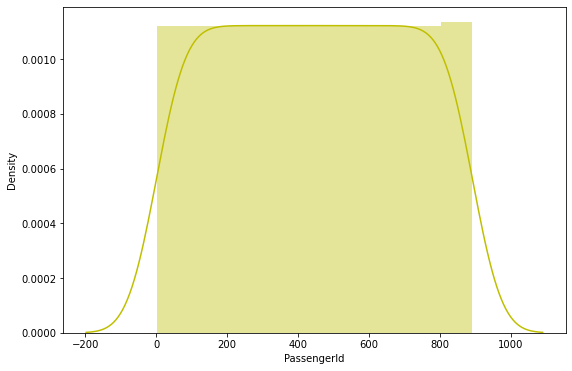

In [26]:
plt.figure(figsize=(9,6))
sns.distplot(df.PassengerId,color='y')

<AxesSubplot:xlabel='Fare', ylabel='Density'>

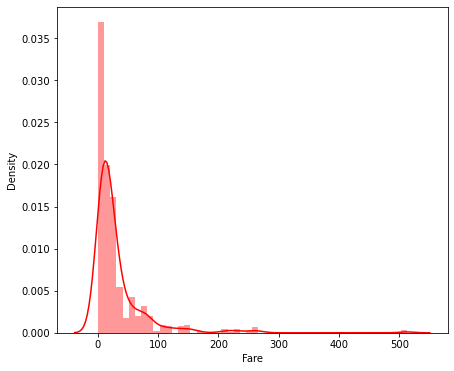

In [27]:
#distplot for fare

plt.figure(figsize=(7,6))
sns.distplot(df.Fare,color='r')

<AxesSubplot:xlabel='Age', ylabel='Density'>

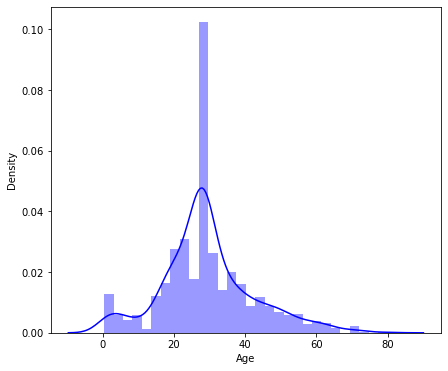

In [28]:
plt.figure(figsize=(7,6))
sns.distplot(df.Age,color='b')

<AxesSubplot:xlabel='Parch', ylabel='Density'>

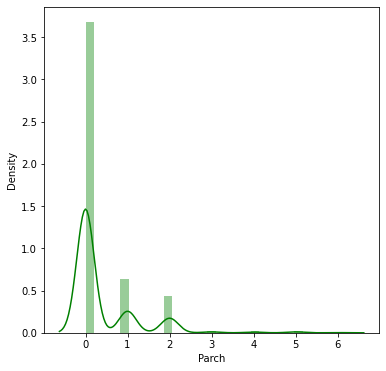

In [29]:
plt.figure(figsize=(6,6))
sns.distplot(df.Parch,color='g')

Text(0.5, 1.0, 'Countplot for Age column')

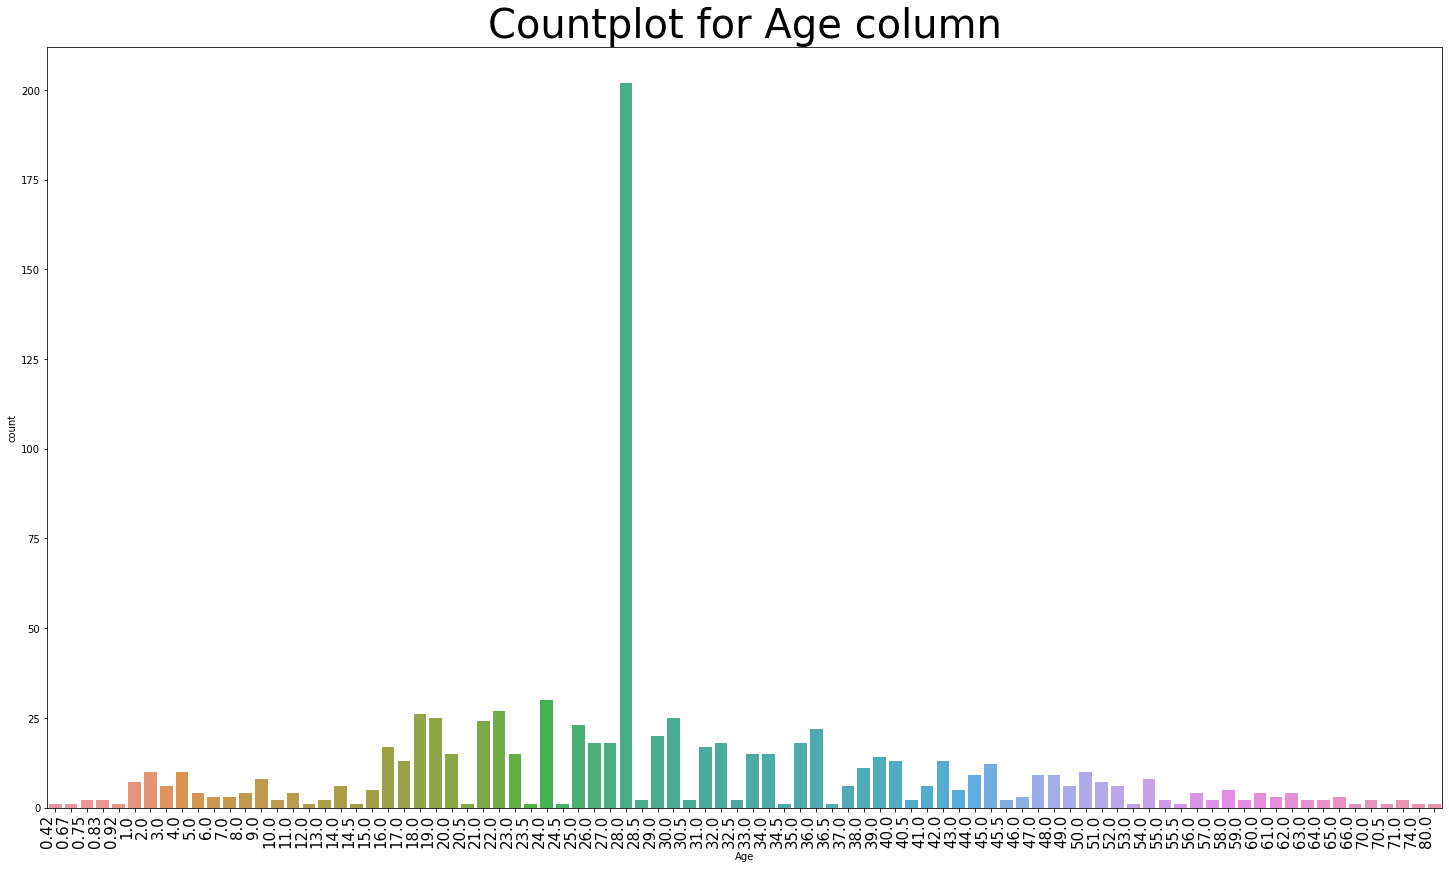

In [30]:
plt.figure(figsize=(25,14))
plt.xticks(rotation=90,ha='right',fontsize=15)
sns.countplot(df['Age'])
plt.title('Countplot for Age column',fontsize=40)

In [31]:
survived_sex=df.groupby('Survived')['Sex'].sum()
survived_sex

Survived
0    468
1    109
Name: Sex, dtype: int32

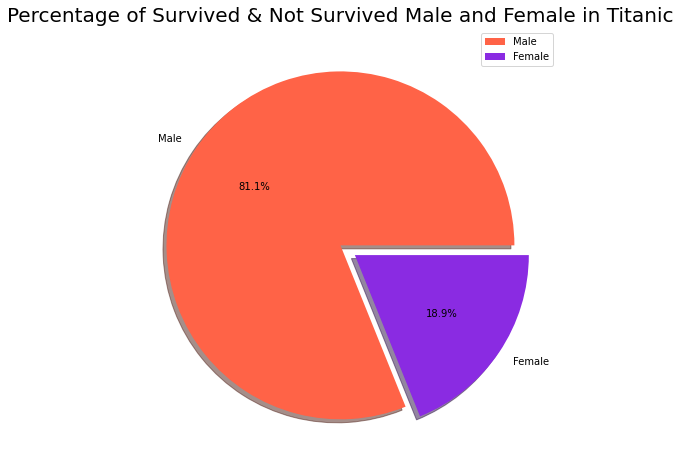

In [32]:
# cheaking Survived 

plt.figure(figsize=(8,8))
plt.title('Percentage of Survived & Not Survived Male and Female in Titanic', fontsize = 20)
explode = [0, 0.1]
labels=['Male','Female']
colors=['tomato','blueviolet']
survived_sex.plot.pie(explode=explode,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')
plt.ylabel('')
plt.legend()


In [33]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


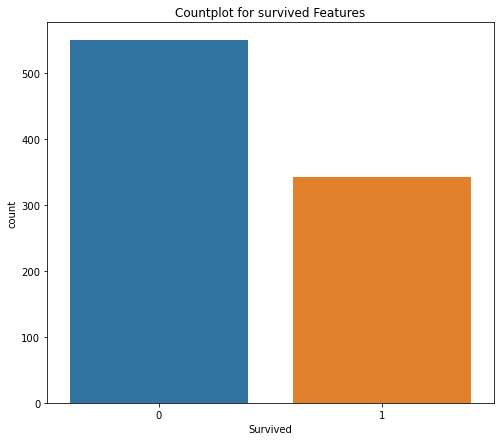

0 - No. of not survived passengers: 549
1 - No. of survived passengers    : 342


In [34]:
# cheaking Survived with countplot

plt.figure(figsize=(8,7))
sns.countplot(df.Survived)
plt.title('Countplot for survived Features')
plt.show()
print(f'0 - No. of not survived passengers: {df["Survived"].value_counts()[0]}')
print(f'1 - No. of survived passengers    : {df["Survived"].value_counts()[1]}')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

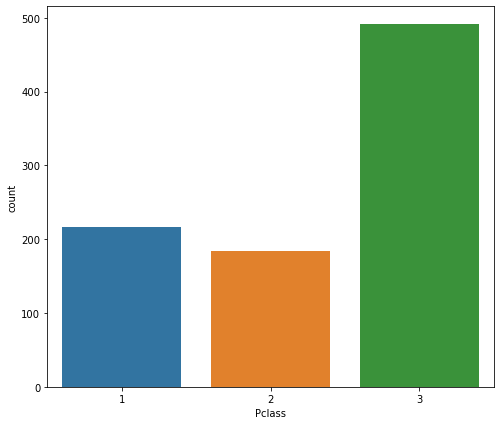

In [35]:
plt.figure(figsize=(8,7))
sns.countplot(df.Pclass)

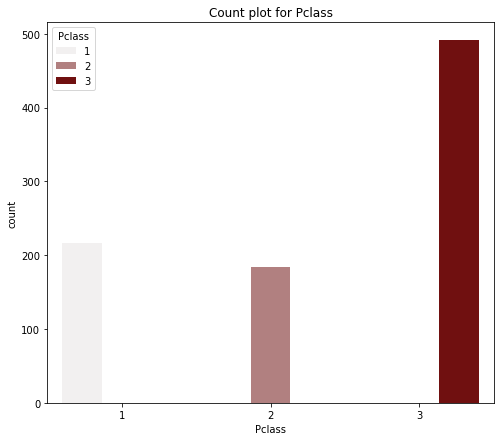

In [36]:
plt.figure(figsize=(8,7))
sns.countplot(df.Pclass,hue=df.Pclass,color='maroon')
plt.title('Count plot for Pclass')
plt.show()

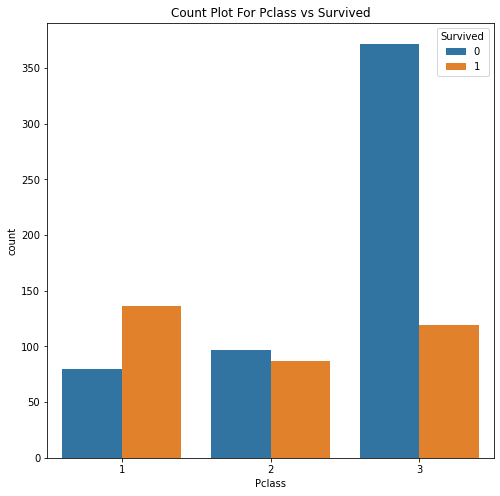

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [37]:
#cheacking the pclass with countplot

plt.figure(figsize=(8,8))
sns.countplot(data=df,x='Pclass',hue='Survived')
plt.title('Count Plot For Pclass vs Survived')
plt.show()

#cheacking with the help of crosstab

pd.crosstab(df['Pclass'],df['Survived'])

Remarks: From the above figure it is inferred that majority of the passengers who were travelling in Economy(3rd) Class of Titanic were not able to survive

<AxesSubplot:xlabel='Fare', ylabel='Density'>

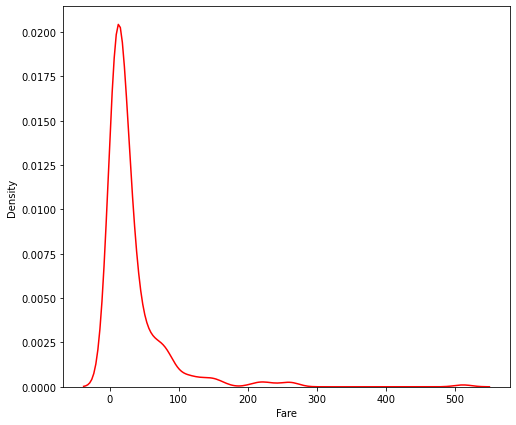

In [38]:
#plot for Fare

plt.figure(figsize=(8,7))
sns.kdeplot(df.Fare,color='r')

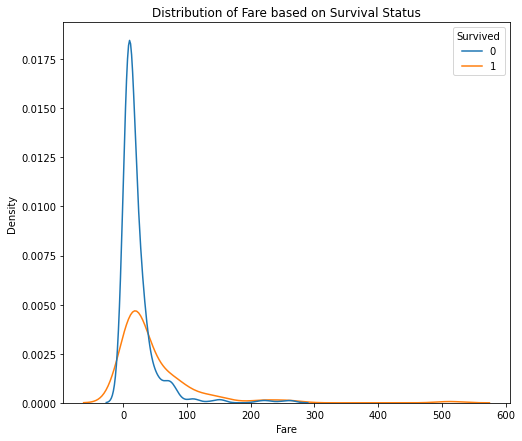

In [39]:
plt.figure(figsize=(8,7))
sns.kdeplot(data=df,x='Fare',hue='Survived')
plt.title('Distribution of Fare based on Survival Status')
plt.show()

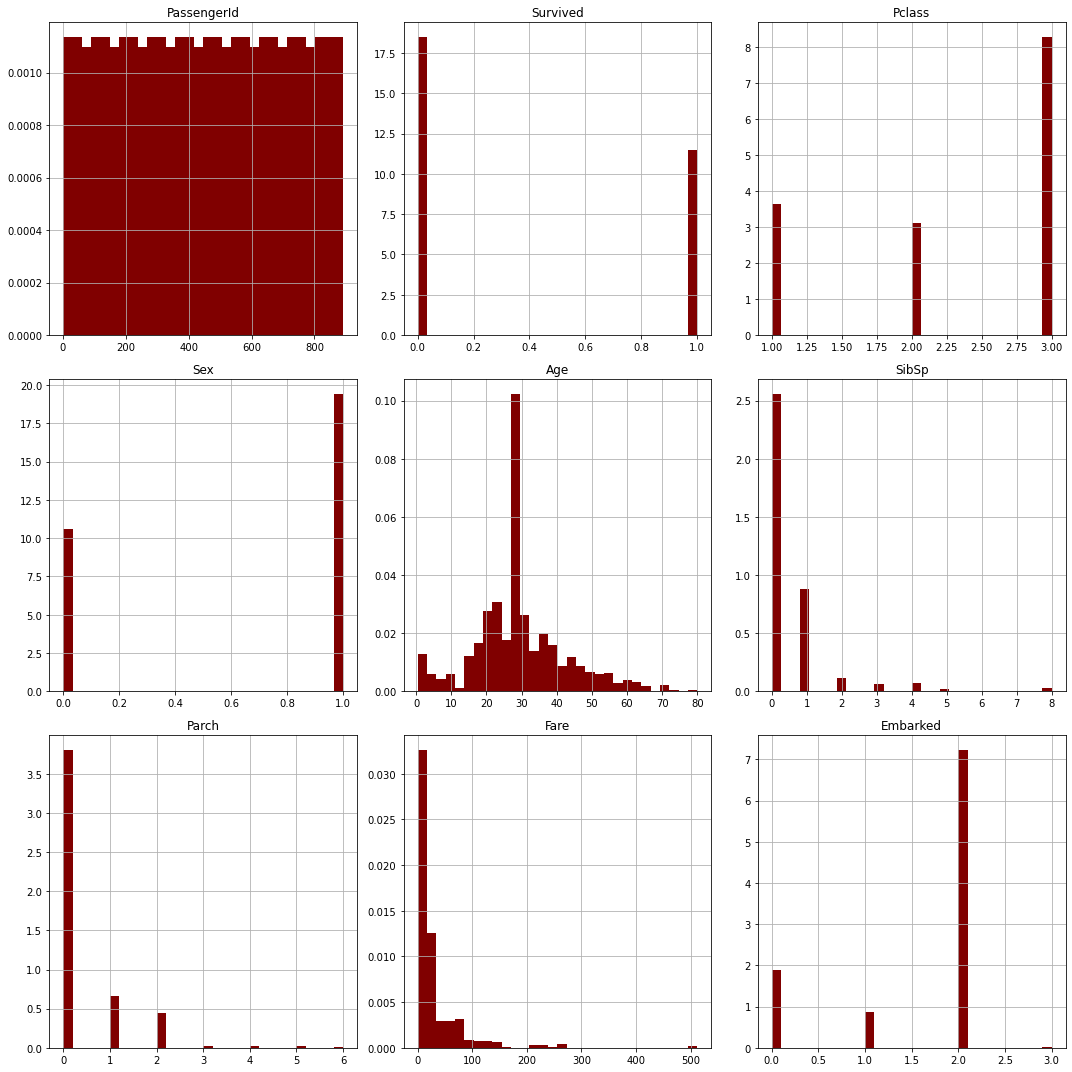

In [40]:
#Histogram

plt.rcParams['figure.figsize'] = (15,15)
df.hist(bins=30, color='maroon', density=True, label='Value', histtype='stepfilled', grid=True)
plt.tight_layout()
plt.show()

Observation: The Average Fare of 1st, 2nd and 3rd Passenger Class is 84, 20, 13 dollars respectively

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8e2ae1c40>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8e2aef430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8e2ae1940>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8e2aef640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8e2aefbe0>],
 'means': []}

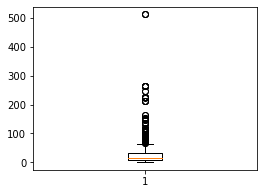

In [41]:
plt.figure(figsize=(4,3))
plt.boxplot(df.Fare)

<AxesSubplot:xlabel='Pclass'>

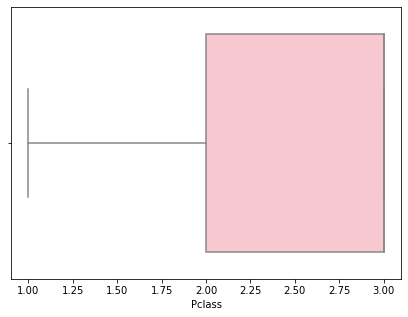

In [42]:
plt.figure(figsize=(7,5))
sns.boxplot(df.Pclass,color='pink')

<AxesSubplot:xlabel='SibSp'>

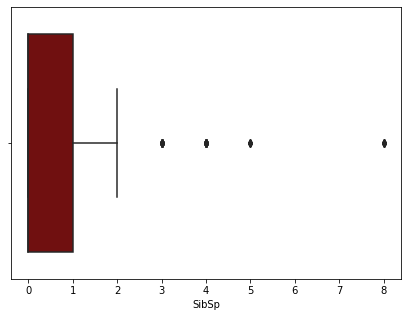

In [43]:
plt.figure(figsize=(7,5))
sns.boxplot(df.SibSp  ,color='maroon')

PassengerId       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Survived       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Pclass         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Sex               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Age            AxesSubplot(0.398529,0.391471;0.227941x0.222059)
SibSp          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Parch                AxesSubplot(0.125,0.125;0.227941x0.222059)
Fare              AxesSubplot(0.398529,0.125;0.227941x0.222059)
Embarked          AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

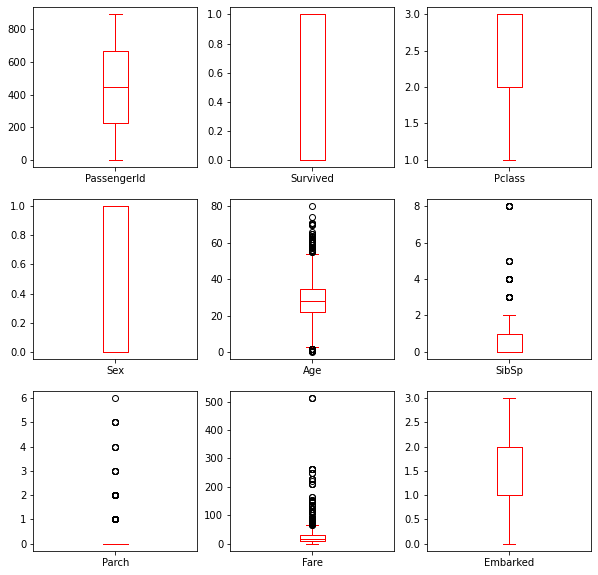

In [44]:
#Cheaking outliers

df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10),color='red')

some columns are having outliers


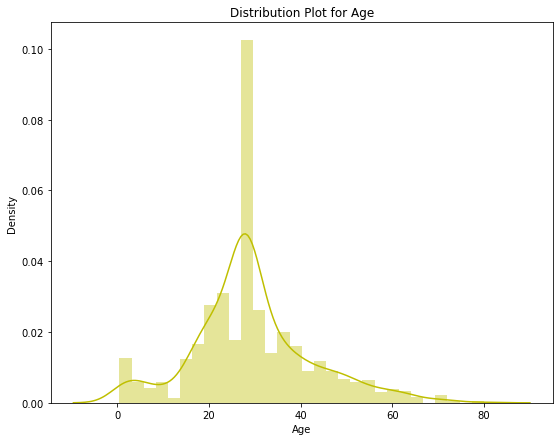

In [45]:
plt.figure(figsize=(9,7))
sns.distplot(df.Age,color='y',)
plt.title('Distribution Plot for Age')
plt.show()

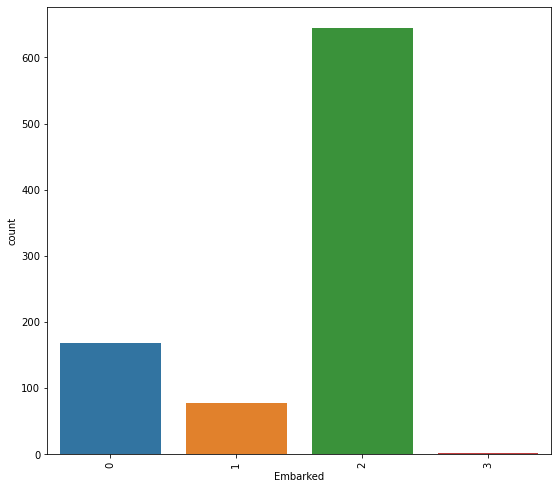

In [46]:
col=['Embarked']

plt.figure(figsize=(15,20))
for i in range(len(col)):
    plt.subplot(3,2,i+1)
    sns.countplot(df[col[i]])
    plt.xticks(rotation=90)
    plt.tight_layout()


# Checking Correlation

In [47]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.104057
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.014205
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.038322
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.221226
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.014205,0.066654,0.038322,-0.221226,1.000000


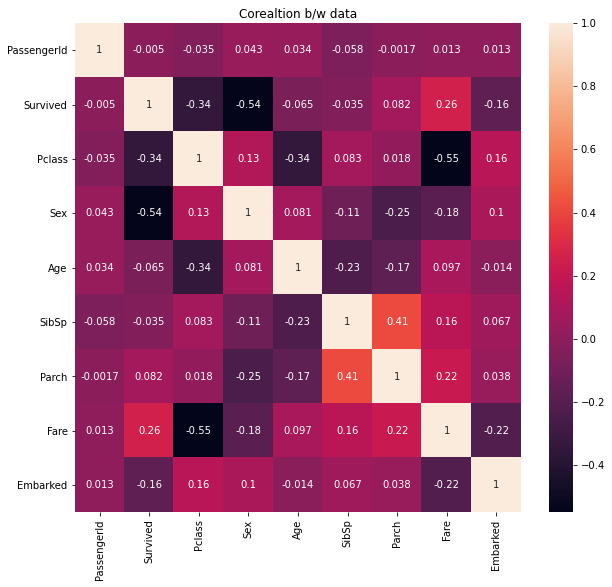

In [48]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True)
plt.title('Corealtion b/w data')
plt.show()

Observations:

1.Pclass is the most correlated numeric feature with Survived(target) attribute compared with other numeric features.

2.Pclass and Fare features have significant negative correlation value.

3.SibSp and Parch, these two features have significant positive correlation value (0.41)
PassengerId feature has no reasonable correlation with any other features

In [49]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


<AxesSubplot:>

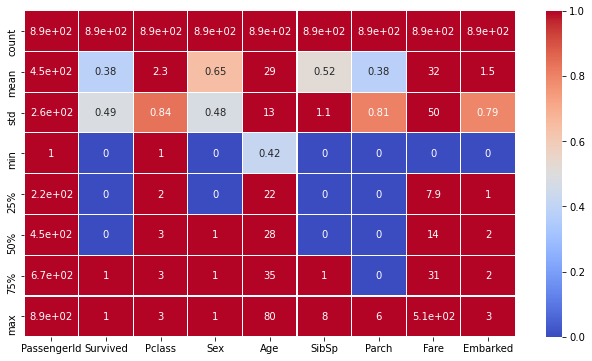

In [50]:
plt.figure(figsize=(11,6))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,vmax=1.0,cmap='coolwarm',linecolor='white')

# checking outliers

PassengerId       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Survived       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Pclass         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Sex               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Age            AxesSubplot(0.398529,0.391471;0.227941x0.222059)
SibSp          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Parch                AxesSubplot(0.125,0.125;0.227941x0.222059)
Fare              AxesSubplot(0.398529,0.125;0.227941x0.222059)
Embarked          AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

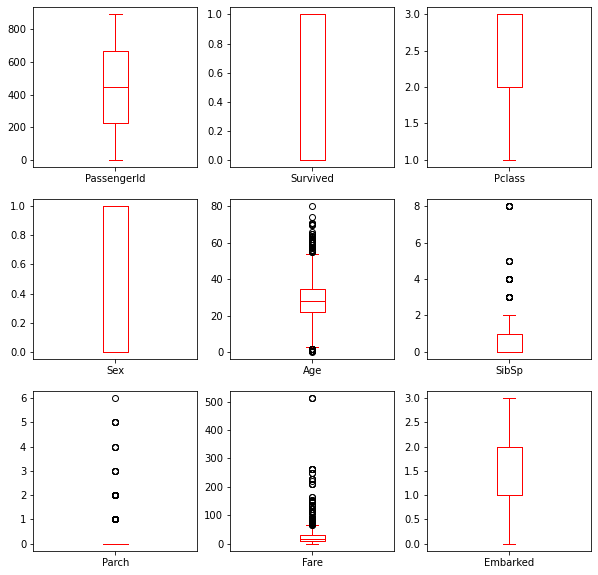

In [51]:
#Cheaking outliers

df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10),color='red')

# Removing outliers

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.47367361, 0.50244517,
        0.58111394],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.47367361, 0.78684529,
        1.93846038],
       [1.72233219, 1.2669898 , 0.82737724, ..., 0.47367361, 0.48885426,
        0.58111394],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 2.00893337, 0.17626324,
        0.58111394],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.47367361, 0.04438104,
        1.93846038],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.47367361, 0.49237783,
        0.67867322]])

In [53]:

print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([6, 5, 6, 7, 5, 5, 5, 5, 6, 7, 4, 4, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       7, 5, 5, 5, 7, 7, 5, 7, 6, 7, 7, 5, 6, 6, 7, 5, 4, 7, 5, 5, 7, 6,
       6, 4, 6, 4, 6, 7, 5, 5, 7, 7, 7, 7, 6, 7, 7, 4, 6, 7, 5, 5, 5, 5,
       5, 5, 4, 6, 5, 6], dtype=int64))


In [54]:
df_new=df[(z<3).all(axis=1)]
df_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [55]:
df_new.shape

(820, 9)

In [56]:
df.shape

(891, 9)

# Skewness:

In [57]:
df_new.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.401952
SibSp          1.979577
Parch          2.122629
Fare           2.318761
Embarked      -1.257511
dtype: float64

# preparing Data for Model:

In [58]:
x = df_new.drop(columns=['Survived'])
y = df_new["Survived"]
print(x.shape)
print(y.shape)

(820, 8)
(820,)


In [59]:
#Removing skewness 

from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.15631324,  0.87283049,  0.72203588, ..., -0.48469263,
        -0.83470177,  0.58397897],
       [-2.14032052, -1.47067587, -1.38497273, ..., -0.48469263,
         1.55364494, -1.77327873],
       [-2.12579352,  0.87283049, -1.38497273, ..., -0.48469263,
        -0.74331399,  0.58397897],
       ...,
       [ 1.56705476,  0.87283049, -1.38497273, ...,  2.08665417,
         0.39490799,  0.58397897],
       [ 1.57009584, -1.47067587,  0.72203588, ..., -0.48469263,
         0.65432009, -1.77327873],
       [ 1.57313595,  0.87283049,  0.72203588, ..., -0.48469263,
        -0.76629016, -1.18493881]])

In [60]:
#scaling training data 

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)
x

array([[-2.15631324,  0.87283049,  0.72203588, ..., -0.48469263,
        -0.83470177,  0.58397897],
       [-2.14032052, -1.47067587, -1.38497273, ..., -0.48469263,
         1.55364494, -1.77327873],
       [-2.12579352,  0.87283049, -1.38497273, ..., -0.48469263,
        -0.74331399,  0.58397897],
       ...,
       [ 1.56705476,  0.87283049, -1.38497273, ...,  2.08665417,
         0.39490799,  0.58397897],
       [ 1.57009584, -1.47067587,  0.72203588, ..., -0.48469263,
         0.65432009, -1.77327873],
       [ 1.57313595,  0.87283049,  0.72203588, ..., -0.48469263,
        -0.76629016, -1.18493881]])

# Spliting the Test data

In [61]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=34)

# Choosing Best Model

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),
      KNeighborsClassifier(),SVC(),ExtraTreesClassifier(),AdaBoostClassifier(),
      GradientBoostingClassifier()]
    
for m in model:
    
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy Score',m,'is :')
    print(accuracy_score(y_test,predm))
    print('Confusion Metrix''\n',confusion_matrix(y_test,predm))
    print('classification report''\n',classification_report(y_test,predm))

Accuracy Score LogisticRegression() is :
0.8130081300813008
Confusion Metrix
 [[130  25]
 [ 21  70]]
classification report
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       155
           1       0.74      0.77      0.75        91

    accuracy                           0.81       246
   macro avg       0.80      0.80      0.80       246
weighted avg       0.82      0.81      0.81       246

Accuracy Score DecisionTreeClassifier() is :
0.7845528455284553
Confusion Metrix
 [[129  26]
 [ 27  64]]
classification report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       155
           1       0.71      0.70      0.71        91

    accuracy                           0.78       246
   macro avg       0.77      0.77      0.77       246
weighted avg       0.78      0.78      0.78       246

Accuracy Score RandomForestClassifier() is :
0.8170731707317073
Confusion Metrix
 [[133  22]
 

# Cross Validation

For checking the overfitting

In [63]:
from sklearn.model_selection import cross_val_score

lg=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
svc=SVC()
et=ExtraTreesClassifier()
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()



In [64]:
cv=cross_val_score(lg,x,y,cv=5)
print('cross val score for logistic model:',cv.mean())

cross val score for logistic model: 0.7890243902439025


In [65]:
cv=cross_val_score(dt,x,y,cv=5)
print('cross val score for Decision Tree model:',cv.mean())

cross val score for Decision Tree model: 0.7560975609756098


In [66]:
cv=cross_val_score(knn,x,y,cv=5)
print('cross val score for Knn model:',cv.mean())

cross val score for Knn model: 0.8012195121951219


In [67]:
cv=cross_val_score(rf,x,y,cv=5)
print('cross val score for Random Forest model:',cv.mean())

cross val score for Random Forest model: 0.7987804878048781


In [68]:
cv=cross_val_score(svc,x,y,cv=5)
print('cross val score for svc model:',cv.mean())

cross val score for svc model: 0.8146341463414635


In [69]:
cv=cross_val_score(et,x,y,cv=5)
print('cross val score for Extra Tree model:',cv.mean())

cross val score for Extra Tree model: 0.8060975609756097


In [70]:
cv=cross_val_score(ad,x,y,cv=5)
print('cross val score for Adaboost model:',cv.mean())

cross val score for Adaboost model: 0.723170731707317


In [71]:
cv=cross_val_score(gb,x,y,cv=7)
print('cross val score for Gradent Boosting model:',cv.mean())

cross val score for Gradent Boosting model: 0.7951822189110324


we wil continue with GradientBoositng

# Hyperparameter Tunning

In [72]:
from sklearn.model_selection import GridSearchCV

parameters={
    "bootstrap":['True','False'],
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "criterion":["gini","entropy"],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "max_features":["auto", "sqrt", "log2"]}
gcv=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5,scoring='accuracy')
gcv.fit(x_train,y_train)
gcv.best_params_

{'bootstrap': 'True',
 'criterion': 'entropy',
 'max_features': 'log2',
 'max_leaf_nodes': 20,
 'n_estimators': 2}

In [77]:
gcv_pred=gcv.best_estimator_.predict(x_test) #predicting the best parameters
accuracy_score(y_test,gcv_pred) #cheacking the final score


0.8008130081300813

In [81]:
et=ExtraTreesClassifier(bootstrap=True,
 criterion='entropy',
 max_features='log2',
 max_leaf_nodes=20,
 n_estimators=2)
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
pred=et.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred))
print('Classification Report''\n',classification_report(y_test,pred))

Accuracy score
 0.8048780487804879
Confusion Matrix
 [[131  24]
 [ 24  67]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       155
           1       0.74      0.74      0.74        91

    accuracy                           0.80       246
   macro avg       0.79      0.79      0.79       246
weighted avg       0.80      0.80      0.80       246



# AUC and ROC Curve

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [82]:
y_pred_prob=et.predict_proba(x_test)[:,1]
y_pred_prob

array([0.  , 0.76, 0.15, 0.98, 0.84, 0.09, 0.08, 0.06, 0.89, 0.73, 0.01,
       0.  , 0.97, 1.  , 0.97, 0.98, 0.97, 0.  , 0.21, 0.13, 0.  , 0.18,
       0.12, 0.09, 0.78, 0.01, 0.21, 0.06, 0.11, 0.89, 0.56, 0.08, 0.96,
       0.08, 0.47, 0.32, 0.3 , 0.41, 0.61, 0.35, 0.13, 0.11, 0.08, 0.99,
       0.54, 0.57, 0.56, 0.13, 0.36, 0.01, 0.  , 0.26, 0.03, 0.09, 0.97,
       0.51, 0.01, 0.48, 0.04, 0.95, 0.33, 0.21, 0.17, 0.63, 0.02, 0.27,
       0.93, 0.  , 0.06, 0.01, 0.33, 0.43, 0.69, 0.11, 0.07, 0.05, 0.3 ,
       0.98, 0.85, 0.83, 0.04, 0.6 , 0.04, 0.24, 0.4 , 0.9 , 0.03, 0.  ,
       0.  , 0.97, 0.29, 0.49, 0.71, 0.52, 0.04, 0.28, 0.  , 0.69, 0.05,
       0.06, 0.98, 0.  , 0.63, 0.38, 0.95, 0.77, 0.26, 0.1 , 0.04, 0.52,
       0.99, 0.83, 0.9 , 0.14, 0.97, 0.02, 0.05, 0.77, 0.23, 0.91, 0.04,
       0.79, 0.  , 0.96, 0.49, 0.17, 0.38, 0.32, 0.18, 0.59, 0.01, 0.49,
       0.09, 0.41, 0.23, 0.36, 0.97, 0.09, 0.9 , 0.07, 0.97, 0.84, 0.  ,
       0.41, 0.14, 0.03, 0.12, 0.83, 0.  , 0.  , 0.

In [84]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr

array([0.        , 0.        , 0.00645161, 0.00645161, 0.00645161,
       0.00645161, 0.00645161, 0.01290323, 0.01290323, 0.01935484,
       0.01935484, 0.01935484, 0.02580645, 0.02580645, 0.03870968,
       0.03870968, 0.0516129 , 0.0516129 , 0.06451613, 0.06451613,
       0.07096774, 0.07741935, 0.07741935, 0.09032258, 0.09032258,
       0.09677419, 0.11612903, 0.11612903, 0.12258065, 0.13548387,
       0.14193548, 0.15483871, 0.17419355, 0.17419355, 0.18064516,
       0.18064516, 0.19354839, 0.20645161, 0.21935484, 0.22580645,
       0.22580645, 0.23225806, 0.23225806, 0.25806452, 0.27096774,
       0.28387097, 0.29677419, 0.30967742, 0.32258065, 0.33548387,
       0.34193548, 0.35483871, 0.36129032, 0.37419355, 0.38709677,
       0.4       , 0.41935484, 0.43225806, 0.4516129 , 0.47741935,
       0.49032258, 0.52258065, 0.53548387, 0.58709677, 0.61935484,
       0.63870968, 0.67096774, 0.70967742, 0.8       , 0.82580645,
       0.89032258, 1.        ])

In [85]:
tpr

array([0.        , 0.06593407, 0.0989011 , 0.16483516, 0.26373626,
       0.2967033 , 0.36263736, 0.37362637, 0.40659341, 0.42857143,
       0.43956044, 0.48351648, 0.50549451, 0.52747253, 0.52747253,
       0.54945055, 0.56043956, 0.59340659, 0.6043956 , 0.62637363,
       0.63736264, 0.63736264, 0.64835165, 0.64835165, 0.65934066,
       0.68131868, 0.68131868, 0.7032967 , 0.71428571, 0.72527473,
       0.73626374, 0.73626374, 0.73626374, 0.75824176, 0.75824176,
       0.76923077, 0.76923077, 0.78021978, 0.78021978, 0.79120879,
       0.81318681, 0.81318681, 0.84615385, 0.84615385, 0.85714286,
       0.85714286, 0.87912088, 0.87912088, 0.87912088, 0.89010989,
       0.91208791, 0.91208791, 0.91208791, 0.92307692, 0.92307692,
       0.93406593, 0.94505495, 0.94505495, 0.94505495, 0.94505495,
       0.94505495, 0.94505495, 0.94505495, 0.96703297, 0.96703297,
       0.96703297, 0.96703297, 0.96703297, 0.96703297, 0.96703297,
       0.96703297, 1.        ])

In [86]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.86, 0.85, 0.84, 0.83, 0.78, 0.77, 0.76, 0.73, 0.71,
       0.7 , 0.69, 0.68, 0.63, 0.59, 0.57, 0.56, 0.54, 0.52, 0.51, 0.49,
       0.48, 0.47, 0.46, 0.43, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.33,
       0.32, 0.31, 0.29, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.19,
       0.18, 0.17, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07,
       0.06, 0.05, 0.03, 0.02, 0.01, 0.  ])

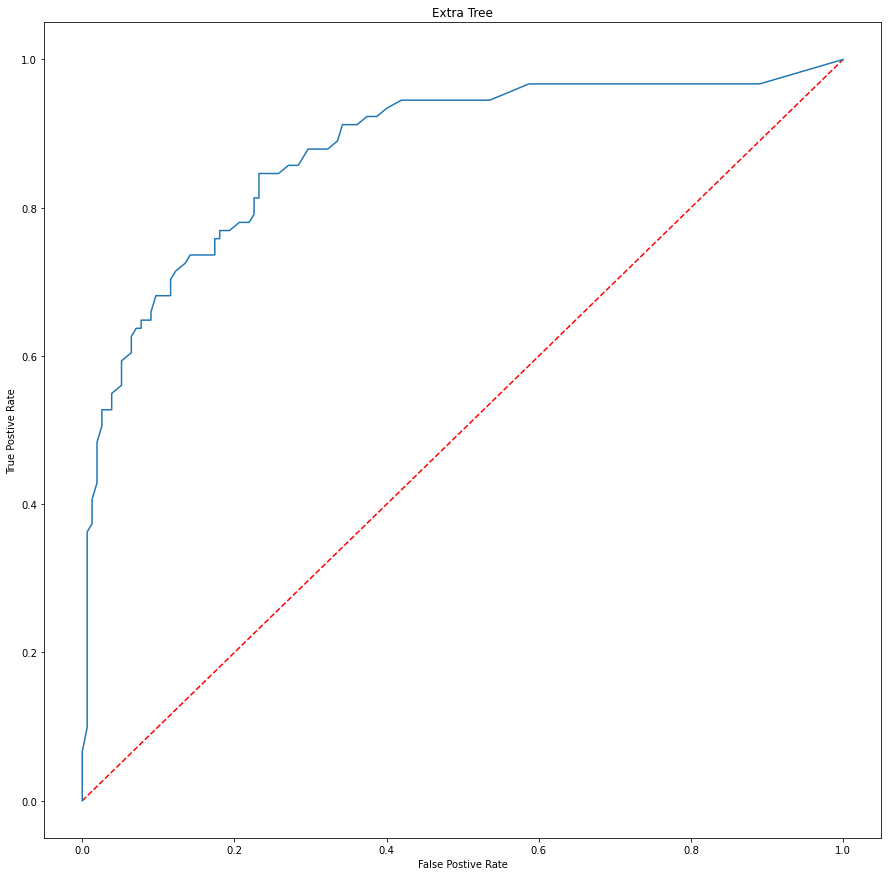

In [88]:
plt.plot([0,1],[0,1],'k--',color='r')
plt.plot(fpr,tpr,label='Extra Tree')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Extra Tree')
plt.show()

In [91]:
auc_score=roc_auc_score(y_test,et.predict(x_test))
print(auc_score)

0.7907125132931585


# 

# Saving the Best Model

In [92]:
import joblib

joblib.dump(gcv.best_estimator_,'Titanic_model.pkl')

['Titanic_model.pkl']

# Loading the model

In [93]:
load_model=joblib.load('Titanic_model.pkl')
result=load_model.score(x_test,y_test)
print(result)

0.8008130081300813


In [94]:
Conc = {"Original":np.array(y_test), "Predicted":np.array(gcv_pred)}
Conc_df = pd.DataFrame(Conc)
Conc_df

,Original,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
241,1,1
242,0,1
243,0,0
244,0,1


Remarks:

Table shows the original target value and predicted target value. From the above table, the model is predicting the values with 80 percent accuracy.